<a href="https://colab.research.google.com/github/royalseeker/hackbio-biocoding-internship/blob/main/Stage2_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task Code 2.3:

**Botany and Plant Science**

Have a look at this [dataset](https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/Pesticide_treatment_data.txt)

* Some scientists are trying to engineer mutants for a crop to become resistant to a pesticide

* They compared the metabolic response of the engineered mutants to the metabolic response of the wild type plants

* The took readings after 8 and 24 hours

*  Your task
   * Calculate the difference in metabolic response (ΔM) between the DMSO treatment from the 24 hours treatment for the wild type and mutants
   * Generate a scatter plot showing the difference for ΔM for WT and Mutants
   * Fit a line that satifies a y-intercept of 0 and a slope of 1.
   * Using a residual cut off of your choice (calculated a the difference between the fitted line and each point) calculate the residual of each point on the scatter plot
   * Color metabolites that fall within +/- n of your residual grey. For example, if you have a cut-off of 0.3, color residual values that are within -0.3 and +0.3 grey
   * Color metabolites that fall outside this range salmon.
   * What are these metabolites. How do you explain the trends you see on either direction of the plot?
   * Pick any 6 metabolites that fall outside this range and generate a line plot that spans from their 0h treatment to their 8h and 24hr.
   * What can you say about the plots you see?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from the provided URL
url = 'https://raw.githubusercontent.com/HackBio-Internship/2025_project_collection/refs/heads/main/Python/Dataset/Pesticide_treatment_data.txt'
data = pd.read_csv(url, sep='\t')

# Ensure the first column is used as an index if it contains sample names
if "Unnamed: 0" in data.columns:
    data.rename(columns={"Unnamed: 0": "Sample"}, inplace=True)  # Rename column for clarity
    data.set_index("Sample", inplace=True)  # Set sample names as the index

# Display dataset shape and first few rows to understand its structure
print("Dataset Shape:", data.shape)
print("Dataset Preview:")
print(data.head())

# Identify sample names corresponding to different treatment groups
wt_dmso_samples = [s for s in data.index if "WT_DMSO_1" in s]  # Wild-type control samples
wt_24h_samples = [s for s in data.index if "WT_pesticide_24h_1" in s]  # Wild-type treated samples (24h)
mut_dmso_samples = [s for s in data.index if "mutant_DMSO_1" in s]  # Mutant control samples
mut_24h_samples = [s for s in data.index if "mutant_pesticide_24h_1" in s]  # Mutant treated samples (24h)

# Ensure that the correct sample groups exist in the dataset
print(f"WT DMSO Samples: {wt_dmso_samples}")
print(f"WT 24h Samples: {wt_24h_samples}")
print(f"Mutant DMSO Samples: {mut_dmso_samples}")
print(f"Mutant 24h Samples: {mut_24h_samples}")

# Calculate mean values for each group to summarize metabolic response
wt_dmso = data.loc[wt_dmso_samples].mean()  # Mean response for WT control
wt_24h = data.loc[wt_24h_samples].mean()  # Mean response for WT after 24h pesticide treatment
mut_dmso = data.loc[mut_dmso_samples].mean()  # Mean response for Mutant control
mut_24h = data.loc[mut_24h_samples].mean()  # Mean response for Mutant after 24h pesticide treatment

# Compute ΔM (change in metabolic response) for WT and Mutants
deltaM_WT = wt_24h - wt_dmso  # Difference between treated and control for WT
deltaM_Mutant = mut_24h - mut_dmso  # Difference between treated and control for Mutant



Dataset Shape: (8, 108)
Dataset Preview:
                    acetylcarnitine  aconitic_acid   adenine  \
Sample                                                         
WT_DMSO_1                  7.000000     -19.447639 -0.066413   
WT_pesticide_0_1           7.035531     -19.445951 -0.363286   
WT_pesticide_8h_1          6.773425     -19.443194  0.048875   
WT_pesticide_24h_1         7.900711     -19.442015  0.195580   
mutant_DMSO_1              6.498987     -19.442820  0.761424   

                    adenosine_cyclic_monophosphate  adenosine_monophosphate  \
Sample                                                                        
WT_DMSO_1                                -1.917890                 2.967939   
WT_pesticide_0_1                         -1.700000                 5.340498   
WT_pesticide_8h_1                        -1.632303                 3.705703   
WT_pesticide_24h_1                       -2.173653                 3.278473   
mutant_DMSO_1                       

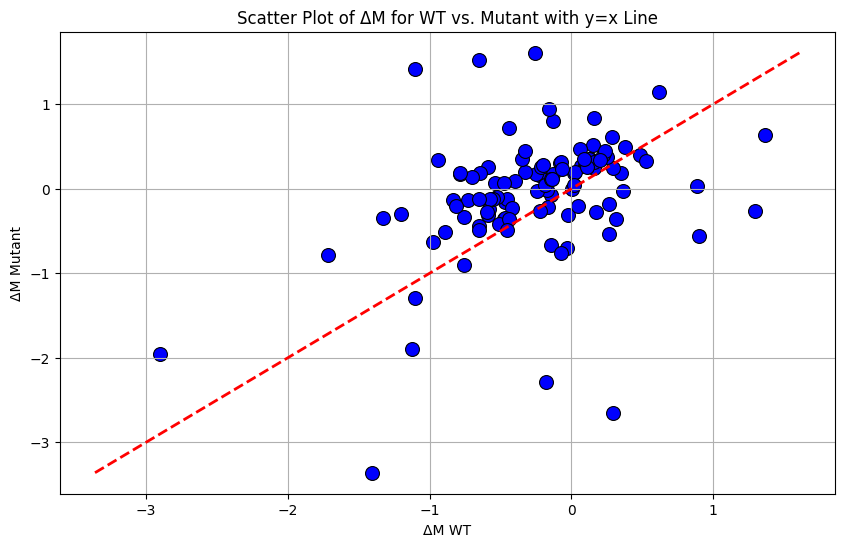

In [ ]:

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Metabolite': data.columns,  # Metabolites are stored as column names
    'ΔM_WT': deltaM_WT.values,  # Change in metabolic response for WT
    'ΔM_Mutant': deltaM_Mutant.values  # Change in metabolic response for Mutant
})

# Generate scatter plot to compare metabolic changes between WT and Mutants
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ΔM_WT', y='ΔM_Mutant', data=df, s=100, color='blue', edgecolor='k')

# Calculate min and max values for a reference y=x line
max_val = max(df['ΔM_WT'].max(), df['ΔM_Mutant'].max())
min_val = min(df['ΔM_WT'].min(), df['ΔM_Mutant'].min())

# Add reference line (y=x) to show equal metabolic response in WT and Mutant
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

# Label axes and add a title
plt.xlabel('ΔM WT')
plt.ylabel('ΔM Mutant')
plt.title('Scatter Plot of ΔM for WT vs. Mutant with y=x Line')
plt.grid(True)
plt.show()


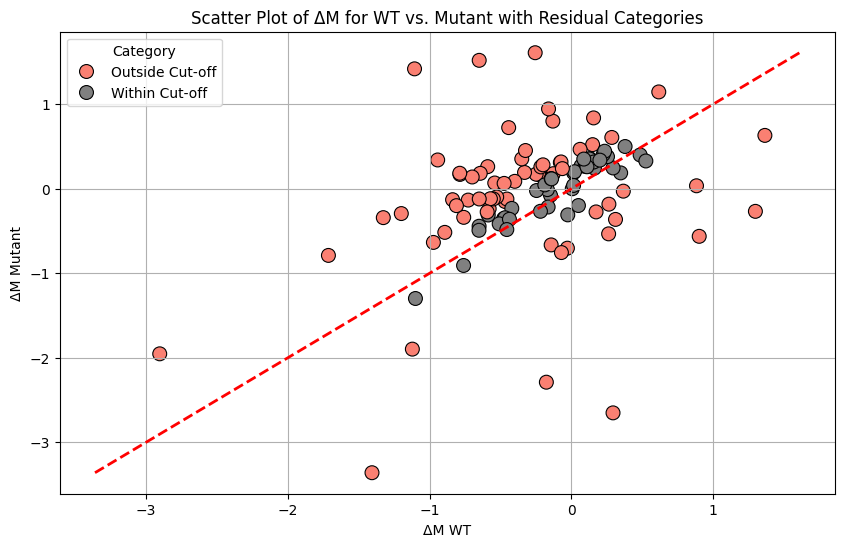

In [ ]:
# Calculate residuals
df['Residual'] = df['ΔM_Mutant'] - df['ΔM_WT']

# Define residual cut-off
cut_off = 0.3

# Categorize metabolites based on residuals
df['Category'] = np.where(df['Residual'].abs() <= cut_off, 'Within Cut-off', 'Outside Cut-off')

# Scatter plot with color-coded categories
plt.figure(figsize=(10, 6))
palette = {'Within Cut-off': 'grey', 'Outside Cut-off': 'salmon'}
sns.scatterplot(x='ΔM_WT', y='ΔM_Mutant', data=df, hue='Category', palette=palette, s=100, edgecolor='k')

# Plot y=x line
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel('ΔM WT')
plt.ylabel('ΔM Mutant')
plt.title('Scatter Plot of ΔM for WT vs. Mutant with Residual Categories')
plt.legend(title='Category')
plt.grid(True)
plt.show()


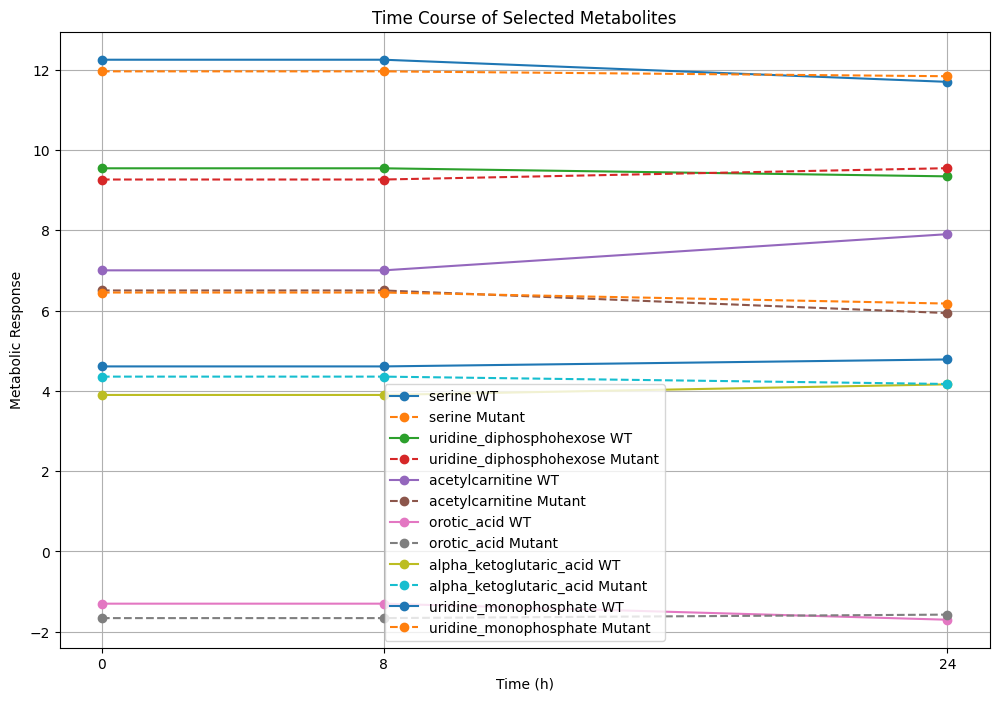

In [ ]:
# Identify metabolites outside the cutoff
df['Category'] = np.where(df['Residual'].abs() <= cut_off, 'Within Cut-off', 'Outside Cut-off')
outliers = df[df['Category'] == 'Outside Cut-off']

# Select 6 metabolites outside the cutoff
selected = outliers.sample(min(6, len(outliers)), random_state=42)  # Ensure sample size does not exceed available outliers


# Generate line plots for each selected metabolite
plt.figure(figsize=(12, 8))
for _, row in selected.iterrows():
    metabolite = row['Metabolite']

    # Extract metabolite values over time for WT and Mutant groups
    wt_0h = data.loc[wt_dmso_samples, metabolite].mean()  # WT DMSO 0h
    wt_8h = data.loc[wt_dmso_samples, metabolite].mean()  # WT DMSO 8h
    wt_24h = data.loc[wt_24h_samples, metabolite].mean()  # WT 24h
    mut_0h = data.loc[mut_dmso_samples, metabolite].mean()  # Mutant DMSO 0h
    mut_8h = data.loc[mut_dmso_samples, metabolite].mean()  # Mutant DMSO 8h
    mut_24h = data.loc[mut_24h_samples, metabolite].mean()  # Mutant 24h

    time_points = [0, 8, 24]
    wt_values = [wt_0h, wt_8h, wt_24h]
    mut_values = [mut_0h, mut_8h, mut_24h]

    # Plot time-course data for each metabolite
    plt.plot(time_points, wt_values, marker='o', label=f'{metabolite} WT', linestyle='-')
    plt.plot(time_points, mut_values, marker='o', label=f'{metabolite} Mutant', linestyle='--')

plt.xlabel('Time (h)')
plt.ylabel('Metabolic Response')
plt.title('Time Course of Selected Metabolites')
plt.xticks(time_points)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Observations:
# - The scatter plot shows the overall metabolic response changes between WT and Mutant.
# - The y=x reference line helps visualize whether mutations increased or decreased metabolic responses.
# - Metabolites with large residuals (highlighted in salmon) deviate significantly from expected trends.
# - The time-course plot shows the metabolic progression over time, helping analyze how these metabolites behave differently in Mutants vs. WT.
# - Some metabolites show increased responses in Mutants, while others decrease, indicating possible metabolic adaptations.


#Github
#https://github.com/mahertantouch/
#https://github.com/royalseeker/